In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gensim
from gensim import corpora, models
import pandas as pd
import pyLDAvis.gensim_models
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords 
import string
from gensim.models import CoherenceModel
import math
from nltk.corpus import wordnet

import warnings
warnings.filterwarnings("ignore")

C:\Users\Yakun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [129]:
np.random.seed(500)
data = pd.read_csv("data_cleaned.csv")
data_df = data[['content','label']]
# data_df.dropna(inplace=True)

# reindexed_data = data_df.squeeze()

In [152]:
# INVALID_WORDS = {'tik', 'tok', 'app', 'apps', 'tiktok','ýýýýýýýý','ýýýýýýý','ýýýýýý','ýýýý','ýýýýýýýýýýýý','ýýýýýýýýý','ýýýýýýýýýý','ýýý','ýýýýýýýýýýýý','ýýýýýýýýýýýýý','ýýýýýýýýýýýýýý','im','u'}

INVALID_WORDS = {'tik', 'tok', 'app', 'apps', 'tiktok', 'im', 'u', 'data', 'dataset', 'model'}
stop_words = set(stopwords.words('english')).union(INVALID_WORDS )

documents = []
texts = []
lemmatizer = WordNetLemmatizer()
digits = set(string.digits)

descriptions = data_df[data_df['content'].notnull()]['content']

for description in descriptions.iteritems():
    document_str = str(description[1]).lower()
    document_str = document_str.translate(str.maketrans('', '', string.punctuation))
    token_words = word_tokenize(document_str)
    pos_tagged = pos_tag(token_words)
    tokens = [(token, get_wordnet_pos(tag)) for token, tag in pos_tagged]
    lemma_tokens = [lemmatizer.lemmatize(token, tag) for token, tag in tokens]
    document = [w for w in lemma_tokens if (not w in stop_words) and (not w.isdigit()) ]
    documents.append(document)
    texts.append(' '.join(document))
print(documents[0])

['great']


In [131]:
dictionary = corpora.Dictionary(documents)
document_term = [dictionary.doc2bow(document) for document in documents]

In [115]:
ldamodel = models.ldamodel.LdaModel(document_term, num_topics=5, id2word = dictionary)
pyLDAvis.enable_notebook()

In [116]:
import re
clusters = ldamodel.print_topics(num_words=15)
for row in clusters:
    row_list = row[1]
    word_list = re.findall(r'[a-z]+', row_list)
    print("Topic", row[0]+1, end = ": ")
    print(word_list)


Topic 1: ['good', 'nice', 'best', 'video', 'viral', 'please', 'amaze', 'ever', 'really', 'thanks', 'account', 'team', 'like', 'entertainment', 'use']
Topic 2: ['great', 'time', 'use', 'let', 'easy', 'try', 'save', 'update', 'make', 'well', 'enjoy', 'experience', 'account', 'people']
Topic 3: ['love', 'awesome', 'time', 'much', 'give', 'video', 'u', 'use', 'one', 'make', 'star', 'wonderful', 'im', 'fun', 'happy']
Topic 4: ['like', 'account', 'please', 'cool', 'get', 'bad', 'wow', 'amazing', 'love', 'thing', 'excellent', 'dont', 'really', 'much', 'team']
Topic 5: ['video', 'account', 'like', 'get', 'plz', 'please', 'cant', 'update', 'people', 'ban', 'dont', 'favorite', 'im', 'make', 'go']


In [117]:
pyLDAvis.gensim_models.prepare(ldamodel, document_term, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.043256  0.081637       1        1  36.810484
3     -0.026234  0.152466       2        1  17.270765
1     -0.115534 -0.121682       3        1  15.806344
0      0.243283 -0.043366       4        1  15.433626
2     -0.058258 -0.069055       5        1  14.678780, topic_info=      Term         Freq        Total Category  logprob  loglift
1     good  1287.000000  1287.000000  Default  30.0000  30.0000
5     nice   748.000000   748.000000  Default  29.0000  29.0000
24    love   834.000000   834.000000  Default  28.0000  28.0000
0    great   336.000000   336.000000  Default  27.0000  27.0000
36    best   413.000000   413.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
75   phone    20.191862    98.747202   Topic5  -5.7204   0.3315
194    get    23.801873   460.427081   Topic5  -5.5559  -1.0436
30      go    21.760187   235.768486   Topic5  -5.6456  -0.4640
26    cant    22.005311   294.608466   Topic5  -5.6344  -0.6756
45    keep    19.435380   130.936226   Topic5  -5.7586   0.0112

[345 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
582       4  0.988088   aap
788       1  0.183862  able
788       3  0.153218  able
788       5  0.643516  able
1031      1  0.954458   acc
...     ...       ...   ...
4766      3  0.949626     ‘
4766      5  0.052757     ‘
5209      3  0.963651     ’
4695      3  0.929419     „
4695      5  0.054672     „

[699 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 2, 1, 3])

In [141]:
# Normal - All dataset 
### Neutral and Negative 
documents = []
texts = []
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english')).union({'data', 'dataset', 'model'}).union(INVALID_WORDS )
digits = set(string.digits)

# data_df = data_df[data_df['label']!='POSITIVE']

descriptions = data_df[data_df['content'].notnull()]['content']

for description in descriptions.iteritems():
    document_str = str(description[1]).lower()
    document_str = document_str.translate(str.maketrans('', '', string.punctuation))
    token_words = word_tokenize(document_str)
    pos_tagged = pos_tag(token_words)
    tokens = [(token, get_wordnet_pos(tag)) for token, tag in pos_tagged]
    lemma_tokens = [lemmatizer.lemmatize(token, tag) for token, tag in tokens]
    document = [w for w in lemma_tokens if (not w in stop_words) and (not w.isdigit()) ]
    documents.append(document)
    texts.append(' '.join(document))
# print(documents[0])

dictionary = corpora.Dictionary(documents)
document_term = [dictionary.doc2bow(document) for document in documents]

In [150]:
ldamodel = models.ldamodel.LdaModel(document_term, num_topics=10, id2word = dictionary)
pyLDAvis.enable_notebook()
import re
clusters = ldamodel.print_topics(num_words=10)
for row in clusters:
    row_list = row[1]
    word_list = re.findall(r'[a-z]+', row_list)
    print("Topic", row[0]+1, end = ": ")
    print(word_list)
    
pyLDAvis.gensim_models.prepare(ldamodel, document_term, dictionary)


Topic 1: ['love', 'best', 'application', 'well', 'time', 'world', 'u', 'entertain', 'entertainment', 'waste']
Topic 2: ['video', 'please', 'like', 'account', 'viral', 'make', 'cool', 'get', 'view', 'follower']
Topic 3: ['good', 'get', 'kid', 'social', 'report', 'beautiful', 'time', 'ban', 'medium', 'nothing']
Topic 4: ['wow', 'ok', 'excellent', 'funny', 'fantastic', 'far', 'show', 'thanks', 'user', 'live']
Topic 5: ['like', 'bad', 'people', 'update', 'amazing', 'really', 'new', 'ban', 'get', 'need']
Topic 6: ['video', 'cant', 'im', 'awesome', 'ever', 'go', 'like', 'best', 'watch', 'update']
Topic 7: ['use', 'fun', 'give', 'account', 'please', 'star', 'easy', 'back', 'make', 'fix']
Topic 8: ['account', 'plz', 'please', 'team', 'problem', 'warn', 'viral', 'hi', 'dear', 'remove']
Topic 9: ['good', 'nice', 'amaze', 'much', 'like', 'really', 'interesting', 'fun', 'entertainment', 'use']
Topic 10: ['great', 'best', 'enjoy', 'experience', 'entertaining', 'fun', 'open', 'l', 'favorite', 'fast'

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.126743  0.024903       1        1  17.011389
5     -0.110431  0.077672       2        1  16.656228
4     -0.068456  0.064850       3        1  11.361395
6     -0.137593  0.005379       4        1  11.003804
7     -0.097426 -0.129461       5        1   9.612960
8      0.209064  0.213065       6        1   8.829713
2      0.002846  0.095879       7        1   8.023579
0      0.151008 -0.144847       8        1   6.767223
9      0.082830 -0.086342       9        1   6.236170
3      0.094899 -0.121097      10        1   4.497539, topic_info=         Term         Freq        Total Category  logprob  loglift
1        good  1340.000000  1340.000000  Default  30.0000  30.0000
24       love   962.000000   962.000000  Default  29.0000  29.0000
5        nice   754.000000   754.000000  Default  28.0000  28.0000
0       great   407.000000   407.000000  Default  27.0000  27.0000
43    account   720.000000   720.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
21        see    12.029346   164.051679  Topic10  -5.0554   0.4888
5        nice    14.314632   754.722041  Topic10  -4.8815  -0.8634
484  platform     8.841434    64.753881  Topic10  -5.3633   1.1105
46       make    10.557721   332.507389  Topic10  -5.1859  -0.3482
12      video    11.582668   990.436561  Topic10  -5.0933  -1.3470

[619 rows x 6 columns], token_table=      Topic      Freq                Term
term                                     
1929      8  0.823524               5star
582       6  0.935767                 aap
788       1  0.024703                able
788       2  0.716385                able
788       4  0.222326                able
...     ...       ...                 ...
1029      6  0.026886               youre
1029      7  0.510827               youre
904       3  0.953656             youtube
2876      5  0.854459  ýýýýýýýýýýýýýýýýýý
4695     10  0.883067                   „

[1500 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 5, 7, 8, 9, 3, 1, 10, 4])

### Neutral and Negative

In [153]:
### Neutral and Negative 


INVALID_WORDS = {'tik', 'tok', 'app', 'apps', 'tiktok', 'im', 'u', 'data', 'dataset', 'model'}
stop_words = set(stopwords.words('english')).union(INVALID_WORDS )

documents = []
texts = []
lemmatizer = WordNetLemmatizer()
# stop_words = set(stopwords.words('english')).union({'data', 'dataset', 'model'}).union(INVALID_WORDS )
digits = set(string.digits)

data_df = data_df[data_df['label']!='POSITIVE']

descriptions = data_df[data_df['content'].notnull()]['content']

for description in descriptions.iteritems():
    document_str = str(description[1]).lower()
    document_str = document_str.translate(str.maketrans('', '', string.punctuation))
    token_words = word_tokenize(document_str)
    pos_tagged = pos_tag(token_words)
    tokens = [(token, get_wordnet_pos(tag)) for token, tag in pos_tagged]
    lemma_tokens = [lemmatizer.lemmatize(token, tag) for token, tag in tokens]
    document = [w for w in lemma_tokens if (not w in stop_words) and (not w.isdigit()) ]
    documents.append(document)
    texts.append(' '.join(document))
# print(documents[0])

dictionary = corpora.Dictionary(documents)
document_term = [dictionary.doc2bow(document) for document in documents]





In [174]:
# LDA Model
ldamodel = models.ldamodel.LdaModel(document_term, num_topics=4, id2word = dictionary)
pyLDAvis.enable_notebook()
import re
clusters = ldamodel.print_topics(num_words=6)
for row in clusters:
    row_list = row[1]
    word_list = re.findall(r'[a-z]+', row_list)
    print("Topic", row[0]+1, end = ": ")
    print(word_list)
    
pyLDAvis.gensim_models.prepare(ldamodel, document_term, dictionary)

Topic 1: ['problem', 'please', 'account', 'warn', 'video', 'get']
Topic 2: ['account', 'cant', 'get', 'update', 'like', 'please']
Topic 3: ['ban', 'like', 'video', 'get', 'bad', 'people']
Topic 4: ['video', 'viral', 'please', 'dont', 'cant', 'get']


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.049617  0.002063       1        1  30.310384
3     -0.048047 -0.076297       2        1  26.896327
2     -0.023930  0.086514       3        1  24.655128
0      0.121595 -0.012280       4        1  18.138161, topic_info=         Term        Freq       Total Category  logprob  loglift
21    account  399.000000  399.000000  Default  30.0000  30.0000
28       warn   58.000000   58.000000  Default  29.0000  29.0000
5       video  411.000000  411.000000  Default  28.0000  28.0000
3     problem  135.000000  135.000000  Default  27.0000  27.0000
115     viral  107.000000  107.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
105  follower   12.566341   66.741867   Topic4  -5.6852   0.0373
14       dont   14.052442  179.031255   Topic4  -5.5734  -0.8376
12       cant   13.127245  204.450612   Topic4  -5.6415  -1.0385
198       fix   12.462150  116.864992   Topic4  -5.6935  -0.5312
115     viral   11.501504  107.831188   Topic4  -5.7737  -0.5309

[319 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
407       2  0.895661       1k
2390      2  0.893547  ability
591       1  0.086155     able
591       2  0.818474     able
591       3  0.043078     able
...     ...       ...      ...
3423      4  0.738123        ‘
3743      3  0.232586        ’
3743      4  0.775285        ’
3370      3  0.467955        „
3370      4  0.508647        „

[566 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

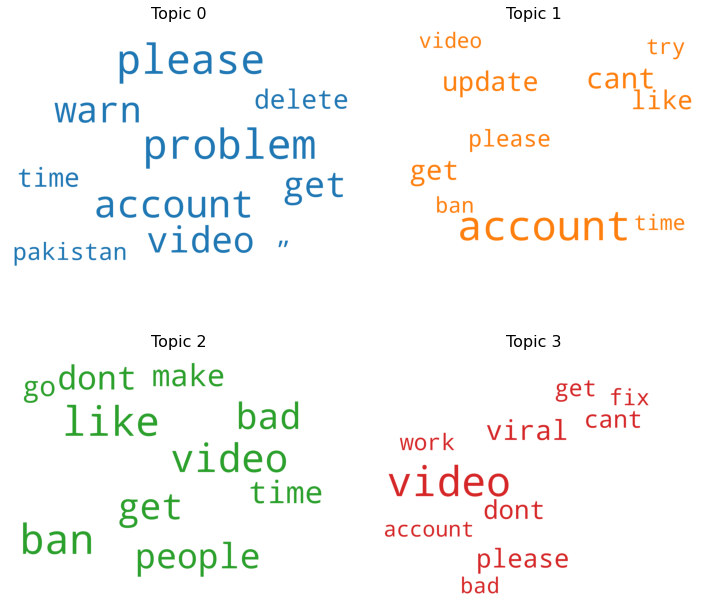

In [178]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [159]:
# LDA Model
ldamodel = models.ldamodel.LdaModel(document_term, num_topics=15, id2word = dictionary)
pyLDAvis.enable_notebook()
import re
clusters = ldamodel.print_topics(num_words=6)
for row in clusters:
    row_list = row[1]
    word_list = re.findall(r'[a-z]+', row_list)
    print("Topic", row[0]+1, end = ": ")
    print(word_list)
    
pyLDAvis.gensim_models.prepare(ldamodel, document_term, dictionary)

Topic 1: ['get', 'account', 'try', 'like', 'video', 'fix']
Topic 2: ['cant', 'bad', 'ok', 'please', 'money', 'install']
Topic 3: ['get', 'update', 'account', 'even', 'problem', 'video']
Topic 4: ['account', 'video', 'please', 'like', 'dont', 'team']
Topic 5: ['video', 'viral', 'account', 'please', 'go', 'like']
Topic 6: ['account', 'good', 'dont', 'get', 'kid', 'ban']
Topic 7: ['people', 'work', 'time', 'still', 'want', 'update']
Topic 8: ['time', 'nc', 'many', 'much', 'op', 'try']
Topic 9: ['please', 'account', 'video', 'remove', 'another', 'add']
Topic 10: ['video', 'support', 'e', 'like', 'account', 'button']
Topic 11: ['problem', 'warn', 'account', 'video', 'pakistan', 'bad']
Topic 12: ['video', 'cant', 'make', 'find', 'time', 'get']
Topic 13: ['favorite', 'cant', 'video', 'favourite', 'button', 'update']
Topic 14: ['ban', 'dont', 'like', 'get', 'account', 'reason']
Topic 15: ['bad', 'update', 'account', 'hate', 'first', 'keep']


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.098236  0.037101       1        1  11.379844
0     -0.000527  0.068723       2        1  10.895613
13    -0.016009  0.096825       3        1   9.451136
5      0.027055  0.079683       4        1   8.254663
10    -0.050934  0.008785       5        1   6.806077
12    -0.010868 -0.007539       6        1   6.565981
2      0.027576  0.037724       7        1   6.086077
3     -0.090622  0.001943       8        1   6.053125
6      0.094575 -0.000831       9        1   5.847639
7      0.129218 -0.010430      10        1   5.811070
14     0.085615  0.016802      11        1   5.750756
11     0.037791 -0.087409      12        1   4.977834
8     -0.083141 -0.025627      13        1   4.882486
9     -0.080840 -0.091379      14        1   3.683041
1      0.029349 -0.124370      15        1   3.554659, topic_info=         Term        Freq       Total Category  logprob  loglift
5       video  474.000000  474.000000  Default  30.0000  30.0000
925  favorite   70.000000   70.000000  Default  29.0000  29.0000
21    account  435.000000  435.000000  Default  28.0000  28.0000
110    please  251.000000  251.000000  Default  27.0000  27.0000
115     viral  125.000000  125.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
161      time    3.969671  158.252483  Topic15  -5.2077  -0.3486
81       work    3.771097  105.243334  Topic15  -5.2591   0.0080
141   nothing    3.726360   57.290379  Topic15  -5.2710   0.6042
198       fix    3.670575  127.336316  Topic15  -5.2861  -0.2096
136       get    3.617049  304.042341  Topic15  -5.3008  -1.0946

[980 rows x 6 columns], token_table=      Topic      Freq                      Term
term                                           
1212      8  0.575914                      100k
1212      9  0.287957                      100k
407      12  0.847912                        1k
2433      1  0.597237                       aap
2390     13  0.860672                   ability
...     ...       ...                       ...
2137     13  0.672664           ýýýýýýýýýýýýýýý
2129      9  0.912040          ýýýýýýýýýýýýýýýý
2138     12  0.829759        ýýýýýýýýýýýýýýýýýý
2783      6  0.889830      ýýýýýýýýýýýýýýýýýýýý
2428      9  0.943759  ýýýýýýýýýýýýýýýýýýýýýýýý

[2493 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 14, 6, 11, 13, 3, 4, 7, 8, 15, 12, 9, 10, 2])

In [187]:
id2word = corpora.Dictionary(documents)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in documents]

In [ ]:
#most representative sentices for each topic 
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)